In [20]:
%pip install requests
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.6 MB 5.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.6 MB 8.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.2/10.6 MB 17.0 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 31.8 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 54.4 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 50.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   --- -----


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import requests, os
import pandas as pd
import numpy as np
from pathlib import Path

API_URL = 'https://tw2.api.riotgames.com/lol/summoner/v4/summoners/by-name/'
RIOTAPI = 'RGAPI-17e9e539-6fbf-4e46-a715-25ec17bb6710'
VERSION = '14.4.1'
SUMMONER_NAME = 'cLyee'

## Get Summoner's infomation

In [3]:
url = API_URL + SUMMONER_NAME
headers = {
    'X-Riot-Token': RIOTAPI
}
response = requests.get(url, headers=headers)

print(response.json())
if response.status_code == 200:
    id = response.json()['id']  # dX42yPW9Rp55Renay4bjE2I2HsBdtrG6oSQVJl0JeuN7Ju2KK5M0Jc9EzA
    accountId = response.json()['accountId']  # i6vnDn1WjPdjRQP6yPbo1McS55_UQwKm8IC6ScfejPwiKu2TTZR65_dK
    puuid = response.json()['puuid']  # n9Ad3kMCf7v0qbQlClspFGU4XXhkdY8B1FEjSt6xuuN1F4OD7oHE0wg29wSBSQors0GC_5H6USH33Q
    name = response.json()['name']  # cLyee
    profileIconId = response.json()['profileIconId']  # 1392
    revisionDate = response.json()['revisionDate']    # 1709222137974
    summonerLevel = response.json()['summonerLevel']  # 173
else:
    print(f"Failed to fetch summoner info: HTTP {response.status_code}")
    

# icon_url = f'http://ddragon.leagueoflegends.com/cdn/{VERSION}/img/profileicon/{profileIconId}.png'
# response = requests.get(icon_url)
# path = os.path.join(BASE_DIR, 'img' , 'profileIcon' , f'{profileIconId}.png')
# os.makedirs(os.path.dirname(path), exist_ok=True)
# if response.status_code == 200:
#     with open(path, 'wb') as file:
#         file.write(response.content)
# else:
#     print(f"Failed to fetch image: HTTP {response.status_code}")

{'id': 'dX42yPW9Rp55Renay4bjE2I2HsBdtrG6oSQVJl0JeuN7Ju2KK5M0Jc9EzA', 'accountId': 'i6vnDn1WjPdjRQP6yPbo1McS55_UQwKm8IC6ScfejPwiKu2TTZR65_dK', 'puuid': 'n9Ad3kMCf7v0qbQlClspFGU4XXhkdY8B1FEjSt6xuuN1F4OD7oHE0wg29wSBSQors0GC_5H6USH33Q', 'name': 'cLyee', 'profileIconId': 1392, 'revisionDate': 1709222138000, 'summonerLevel': 173}


## Get Summoner's Matching Game History
* Get a list of match ids by puuid
* `MATCH-V5`: /lol/match/v5/matches/by-puuid/{puuid}/ids

In [4]:
API_URL = 'https://sea.api.riotgames.com/lol/match/v5/matches/by-puuid/n9Ad3kMCf7v0qbQlClspFGU4XXhkdY8B1FEjSt6xuuN1F4OD7oHE0wg29wSBSQors0GC_5H6USH33Q/ids?start=0&count='
COUNT = 100

url = API_URL + str(COUNT)
headers = {
    'X-Riot-Token': RIOTAPI
}
response = requests.get(url, headers=headers)
matches = response.json()
df = pd.DataFrame(matches, columns=['Match ID'])


print(matches)
# print(df)


['TW2_174568694', 'TW2_174563715', 'TW2_172518796', 'TW2_171264222', 'TW2_171256245', 'TW2_171235285', 'TW2_171216519', 'TW2_171160948', 'TW2_171158089', 'TW2_169609351', 'TW2_169588816', 'TW2_169580681', 'TW2_167964735', 'TW2_167961341', 'TW2_167954189', 'TW2_167939094', 'TW2_167928120', 'TW2_167544871', 'TW2_167553048', 'TW2_167528394', 'TW2_167518560', 'TW2_167228980', 'TW2_167235034', 'TW2_167218814', 'TW2_167221148', 'TW2_167206471', 'TW2_167201447', 'TW2_167195140', 'TW2_167144810', 'TW2_166592429', 'TW2_166588086', 'TW2_166367960', 'TW2_161619812', 'TW2_160353500', 'TW2_160035944', 'TW2_154837558', 'TW2_154835113', 'TW2_154820567', 'TW2_139264715', 'TW2_139260414', 'TW2_139247939', 'TW2_139241540', 'TW2_139229724', 'TW2_139215962', 'TW2_139210384', 'TW2_139191863', 'TW2_139170783', 'TW2_139150856', 'TW2_139117945', 'TW2_118502273', 'TW2_118485500', 'TW2_118477252', 'TW2_118463236', 'TW2_118439865', 'TW2_117567522', 'TW2_117551805', 'TW2_117551153', 'TW2_117538042', 'TW2_11717613

* Get a match by match id
* `MATCH-V5`: /lol/match/v5/matches/{matchId}

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [39]:
import time

GAME_ID = 'TW2_174568694'
API_URL = 'https://sea.api.riotgames.com/lol/match/v5/matches/'

request_interval = 1.0 / 20

# url = API_URL + GAME_ID
headers = {
    'X-Riot-Token': RIOTAPI
}

info = None
participants_data = []
for i in range(len(matches)):
    url = API_URL + matches[i]
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        match_details = response.json()  # 整個return的json
        info = match_details['info']['teams']
        teams = match_details['info']['teams']
        for participant in match_details['info']['participants']:
            participants_data.append(participant)
            
    else:
        print(f"Failed to retrieve data for match {matches[i]}, HTTP {response.status_code}")

    time.sleep(request_interval)

Analyze player's data by random forest.

In [40]:
print(participants_data[0]['challenges']['killParticipation'])
print(teams)


0.8409090909090909
[{'bans': [], 'objectives': {'baron': {'first': False, 'kills': 0}, 'champion': {'first': False, 'kills': 40}, 'dragon': {'first': False, 'kills': 0}, 'inhibitor': {'first': True, 'kills': 1}, 'riftHerald': {'first': False, 'kills': 0}, 'tower': {'first': True, 'kills': 4}}, 'teamId': 100, 'win': True}, {'bans': [], 'objectives': {'baron': {'first': False, 'kills': 0}, 'champion': {'first': True, 'kills': 24}, 'dragon': {'first': False, 'kills': 0}, 'inhibitor': {'first': False, 'kills': 0}, 'riftHerald': {'first': False, 'kills': 0}, 'tower': {'first': False, 'kills': 0}}, 'teamId': 200, 'win': False}]


In [48]:
df = pd.DataFrame(participants_data)
features = ['kills', 'deaths', 'assists', 'goldEarned', 'totalDamageDealt', 'totalDamageTaken', 'timePlayed', 'damageDealtToBuildings']

X = df[features]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")

importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

correlation_matrix = df[features + ['win']].corr()
correlation_with_win = correlation_matrix['win'].drop('win') 
print(correlation_with_win)

Model accuracy: 0.8050
kills: 0.0708
deaths: 0.1125
assists: 0.1331
goldEarned: 0.1091
totalDamageDealt: 0.1056
totalDamageTaken: 0.1045
timePlayed: 0.0775
damageDealtToBuildings: 0.2869
kills                     1.563949e-01
deaths                   -2.463790e-01
assists                   2.647473e-01
goldEarned                1.471079e-01
totalDamageDealt          7.160583e-02
totalDamageTaken         -8.848737e-02
timePlayed               -3.933709e-17
damageDealtToBuildings    4.278712e-01
Name: win, dtype: float64


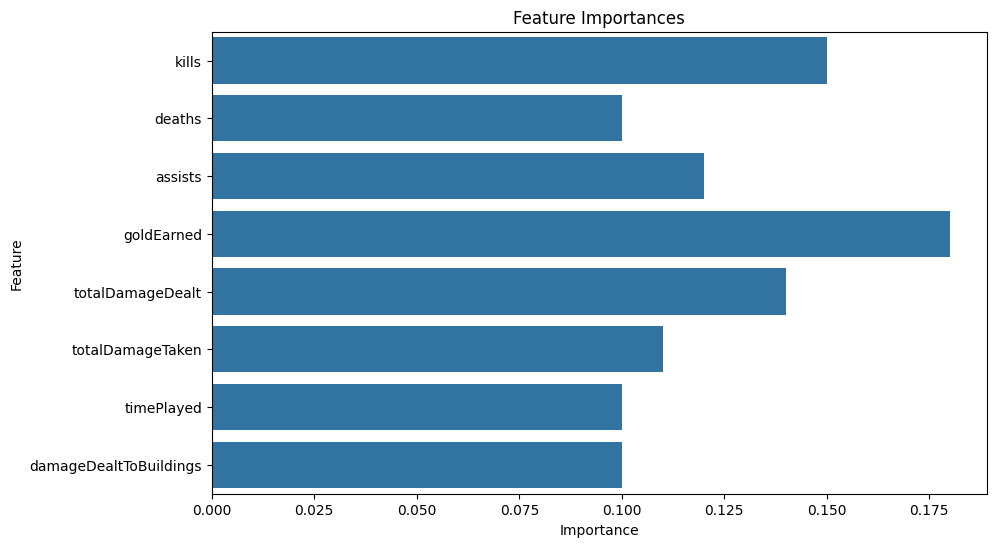

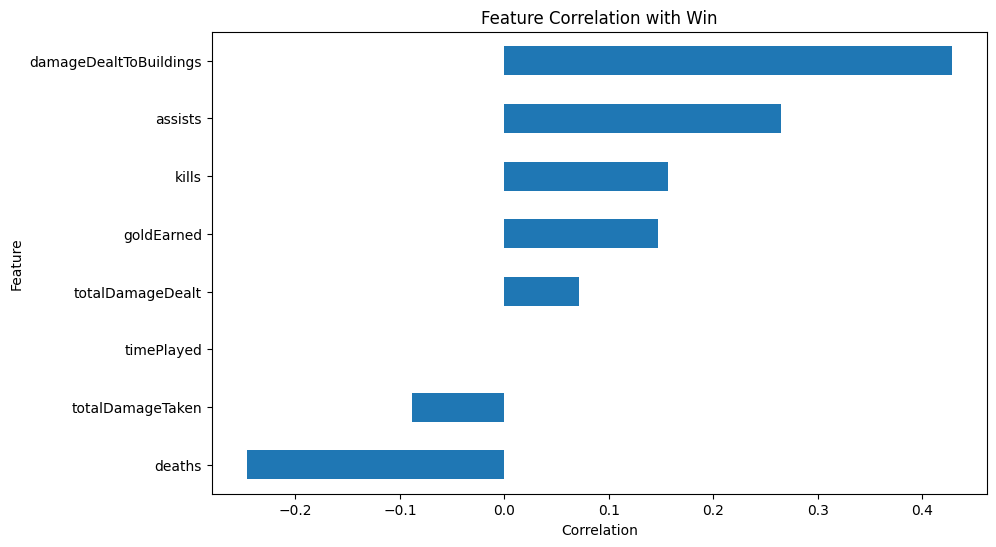

In [49]:
import seaborn as sns
importances = [0.15, 0.1, 0.12, 0.18, 0.14, 0.11, 0.1, 0.1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

correlation_data = pd.Series(correlation_with_win)
plt.figure(figsize=(10, 6))
correlation_data.sort_values().plot(kind='barh')
plt.title('Feature Correlation with Win')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

## Get champion's Information


In [43]:
%pip install pprint
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pprint, json
API_URL = 'https://ddragon.leagueoflegends.com/cdn/14.4.1/data/zh_TW/champion/Aatrox.json'
response = requests.get(API_URL, headers=headers)
data = response.json()

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

pprint.pprint(data)

{'data': {'Aatrox': {'allytips': ['- 發動冥血邪劍期間使用冥影衝鋒來提升命中的機率。',
                                  '- 善用友軍或自身擁有的硬控場效果技能（像是冥府血鏈）來幫助你施展冥血邪劍的連技。',
                                  '- 當你確定你可以開戰的時候直接發動劍魔滅世，無須有任何猶豫。'],
                     'blurb': '尊貴的蘇瑞瑪守護者過去曾為符文大地挺身對抗虛空，只不過厄薩斯和他的同伴們最後卻成為比虛空還要危險的威脅。然而，誰都沒有料想到強大的他居然會被人類的魔法所擊敗。厄薩斯的靈魂寄宿在冥血邪劍之中，經過數個世紀之後，他成為了首位發現如何重獲自由的冥血族。他侵蝕那些嘗試揮舞冥血邪劍的愚蠢人類，將他們的身心據為己有。現在他以近乎原始型態的軀體在符文大地遊蕩，誓言讓世界再次陷入末日來完成他的復仇。',
                     'enemytips': ['- 厄薩斯的攻擊是可預測的，善用發動前的空檔來躲掉他的技能。',
                                   '- 位於冥府血鏈的範圍時，往左右兩側逃或是剛好在厄薩斯身邊時會更容易躲掉。',
                                   '- 厄薩斯發動大絕技能時與他保持距離以免他重生。'],
                     'id': 'Aatrox',
                     'image': {'full': 'Aatrox.png',
                               'group': 'champion',
                               'h': 48,
                               'sprite': 'champion0.png',
                               'w': 48,
                               'x': 0,
                               'y